In [128]:
using Images, ImageView
using FileIO

In [129]:
#leitura
img = load("../peppers.jpg");

#transformando de RGB para HSV
hsv = HSV.(img);

In [130]:
#channelview permite que acessemos os canais atraves da sintaxe matricial
#rgb[1,:,:,] <- RED
#rgb[2,:,:,] <- GREN
#rgb[3,:,:,]  <- BLUE
M = channelview(hsv);
rgb = channelview(img);

In [131]:
#aplicando a mascara
#pegando apenas valores maiores entre [0, 10] no hue ou  maiores que 240
#pegando apenas os valores maiores que 0.5 no saturation e value
mask = ((M[1,:,:].>=0) .&& (M[1,:,:].<=10) .|| (M[1,:,:].>=240)) .&&
(M[3,:,:].>=0.7) .&& (M[2,:,:].>=0.30);

In [132]:
G = M

G[1,:,:] = rgb[1,:,:].*mask
G[2,:,:] = rgb[2,:,:].*mask
G[3,:,:] = rgb[3,:,:].*mask;

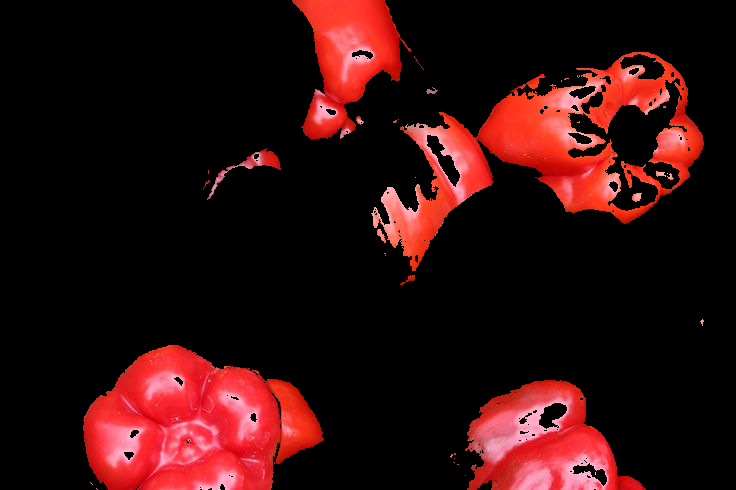

In [133]:
H = colorview(RGB,G)
#save("../apenas_verd_ruim.jpg", H)

In [134]:
tam=15;
se = ones(tam, tam);
filtro = imfilter(float.(mask), se);
#dilatar
dil_img = filtro.> 0.5
#erodir
ero_img = filtro.>= (tam*tam)-1
#logo, para fechar os buracos precisa fazer uma operação de fechamento, ou
#seja, dilatação seguida de erosão


490×736 BitMatrix:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱     ⋮              ⋮              ⋮
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0 

In [135]:
tam = 14;
#dilatar
filtro = imfilter(float.(mask), se);
dil_img = filtro.> 0.6
#erodir
filtro = imfilter(float.(dil_img), se);
ero_img = filtro.>= (tam*tam)-1
G[1,:,:] = rgb[1,:,:].*ero_img
G[2,:,:] = rgb[2,:,:].*ero_img
G[3,:,:] = rgb[3,:,:].*ero_img

490×736 Array{N0f8,2} with eltype N0f8:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱       ⋮                        ⋮
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  

In [139]:
G = colorview(RGB,G)
save("../apenas_verm_melhor2.jpg", G)

42139